In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from sklearn.datasets import load_iris
import pandas as pd

0. Reading data - Run the following code and check you can see the dataset

In [214]:
iris_bunch = load_iris()
A = iris_bunch.data
B = iris_bunch.target

df = pd.DataFrame(data=A, columns=['v1','w1','v2','w2'])
df['Group'] = iris_bunch.target_names[B]
df = df.iloc[0:100,]
df

,v1,w1,v2,w2,Group
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


1. Explore Data

(1) How many different groups do we have in the dataset? Provide the names of groups and the number of observations of each group.

In [215]:
df.groupby(["Group"]).agg(["count"]).round(2)

,v1,w1,v2,w2
,count,count,count,count
Group,,,,
setosa,50,50,50,50
versicolor,50,50,50,50


There are two types of group called **setosa** (50 observations) and **versicolor** (50 observations)

(2) Create two variables in the data frame df and display df.

- $x$ = sum of $v_1$ and $v_2$ 

- $y$ = sum of $w_1$ and $w_2$ 


In [216]:
df["x"] = df["v1"] + df["v2"]
df["y"] = df["w1"] + df["w2"]
df

,v1,w1,v2,w2,Group,x,y
0,5.1,3.5,1.4,0.2,setosa,6.5,3.7
1,4.9,3.0,1.4,0.2,setosa,6.3,3.2
2,4.7,3.2,1.3,0.2,setosa,6.0,3.4
3,4.6,3.1,1.5,0.2,setosa,6.1,3.3
4,5.0,3.6,1.4,0.2,setosa,6.4,3.8
...,...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor,9.9,4.2
96,5.7,2.9,4.2,1.3,versicolor,9.9,4.2
97,6.2,2.9,4.3,1.3,versicolor,10.5,4.2
98,5.1,2.5,3.0,1.1,versicolor,8.1,3.6


(3) Make histograms for $x$ and $y$ in the same figure with different colors.

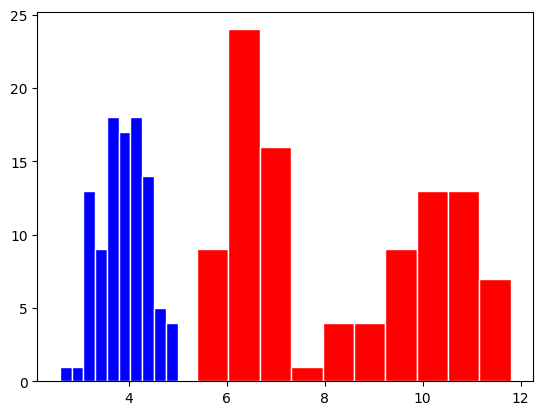

In [217]:
x, y = df["x"], df["y"]
plt.hist(x, color="red", edgecolor="white")
plt.hist(y, color="blue", edgecolor='white')
plt.show()

(4) Create the scatterplot for $x$ and $y$ using a different color for each group.

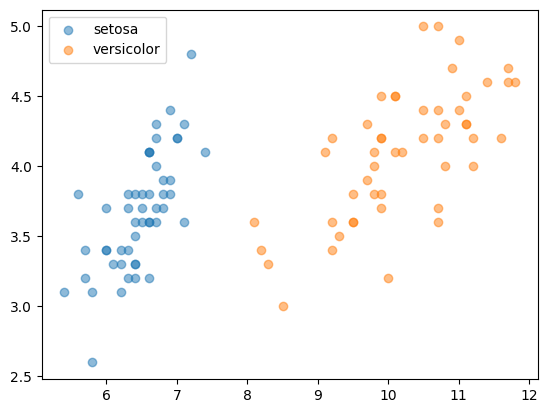

In [218]:
for group in df['Group'].unique():
    subset = df[df['Group'] == group]
    plt.scatter(
        subset['x'],
        subset['y'],
        label=group,
        alpha=0.5
    )
plt.legend()
plt.show()

(5) Calculate the means and standard deviations of $x$ and $y$ for **each group**. 
Do not calculate one by one. The result should be given by one line of code.

In [219]:
df.groupby("Group")[["x", "y"]].agg(["mean", "std"])

x        y    
           mean std mean std
Group                       
setosa      6.5 0.4  3.7 0.4
versicolor 10.2 0.9  4.1 0.5

2. Consider a regression model: $\quad y_i = \beta_0+\beta_1 x_i + \varepsilon_i$

(1) Find $\hat\beta_0$ and $\hat\beta_1$. Write the equation of the fitted regression line: $\quad \hat y_i = \hat\beta_0+\hat\beta_1 x_i$

In [220]:
xbar = np.mean(x)
ybar = np.mean(y)
sxx = np.sum((x - xbar) ** 2)
syy = np.sum((y - ybar) ** 2)
sxy = np.sum((x - xbar) * (y - ybar))

data = np.column_stack((xbar, ybar, sxx, syy, sxy))
SS = pd.DataFrame(data, columns= ['xbar', 'ybar', 'sxx', 'syy', 'sxy'])
pd.options.display.float_format = '{:,.1f}'.format 
display(SS)

beta1hat = sxy / sxx
beta0hat = ybar - (beta1hat * xbar)
data = np.column_stack((beta1hat, beta0hat))
beta_table = pd.DataFrame(data, columns=['beta0hat', 'beta1hat'])
display(beta_table)

# We always calculate the beta1hat first, then the beta0hat
print(f"The coefficient of the fitted linear regression model is y = {beta0hat:6.4} + {beta1hat:6.3}x")


,xbar,ybar,sxx,syy,sxy
0,8.3,3.9,398.4,23.7,60.1


,beta0hat,beta1hat
0,0.2,2.6


The coefficient of the fitted linear regression model is y =  2.628 +  0.151x


(2) Add the equation of the fitted regression line to the scatter plot you obtained in 1-(4).

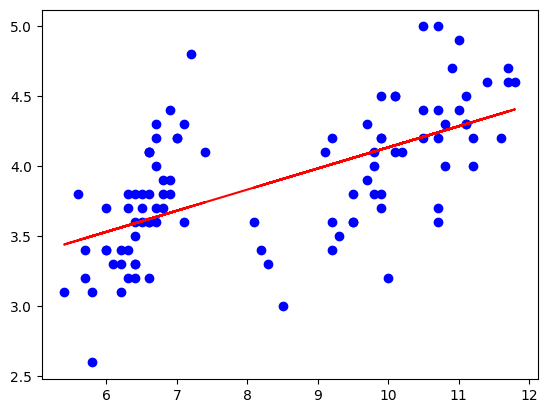

In [221]:
yhat = beta0hat + (beta1hat * x)
plt.scatter(x, y, color= 'blue')
plt.plot(x, yhat, color= 'red')
plt.show()

(3) Find the residual of the third observation $(x_3,\, y_3) = (6.0,\,3.4)$

In [222]:
yhat = beta0hat + (beta1hat * x)
residual_e = y - yhat
data = np.column_stack((x, y, yhat, residual_e))
beta_table = pd.DataFrame(data, columns=['x', 'y', 'yhat', 'residual_e'])

print(f"The value of the third observation, with residual of {-0.1}")
display(beta_table.loc[2:2])

The value of the third observation, with residual of -0.1


,x,y,yhat,residual_e
2,6.0,3.4,3.5,-0.1


(4) What is the predicted value $\hat y$ when $x=8.5$?

In [223]:
print(beta0hat, beta1hat)
predicted_y = beta0hat + (beta1hat * 8.5)
print(f"The predicted value for y when x = 8.5 is {predicted_y}")

2.6279775793037254 0.15086682917622113
The predicted value for y when x = 8.5 is 3.910345627301605


(5) Find $R^2$ and $s^2$.

In [224]:
SST = np.sum((y - ybar) ** 2) # SST = syy, in ANOVA context,
SSR = np.sum((yhat - ybar) ** 2)
SSE = np.sum((y - yhat) ** 2)
n = df.shape[0]
print(f"The value for n is {n}")

s2 = SSE / (n - 2)
s = np.sqrt(s2)

R2 = SSR / SST
r = sxy / np.sqrt(sxx * syy)

# double check that the r^2 should be equal to R2
print(f"Check that r2 == R2, r2 = {r**2}; R2 = {R2}")
print(f"Check that beta1hat ({beta1hat}) == r * sqrt(syy/sxx) ({r * np.sqrt(syy/sxx)})")

r = sxy / np.sqrt(sxx * syy)
data = np.column_stack((s2, s, R2, r))
pd.options.display.float_format = '{:,.3f}'.format 
summary = pd.DataFrame(data, columns = ['s2', 's', 'R2', 'r'])
display(summary)

print(f"The value for R^2 is {R2:.2f} and the value for s^2 is {s2:.2f}")

The value for n is 100
Check that r2 == R2, r2 = 0.38218537006108094; R2 = 0.3821853700610808
Check that beta1hat (0.15086682917622113) == r * sqrt(syy/sxx) (0.15086682917622113)


,s2,s,R2,r
0,0.150,0.387,0.382,0.618


The value for R^2 is 0.38 and the value for s^2 is 0.15


(6) Consider a hypothesis test: $H_0: \beta_1 = 0 \quad vs \quad H_1: \beta_1 \neq 0$. Decide whether we reject $H_0$ or not.

In [225]:
alpha = 0.05
sebeta0 = s * np.sqrt((1 / n) + ((xbar ** 2) / sxx))
sebeta1 = s / (np.sqrt(sxx))
k = 1
dim = n - k - 1

tbeta0 = beta0hat / sebeta0
tbeta1 = beta1hat / sebeta1
pvalue0 = (1 - stats.t.cdf(abs(tbeta0), dim)) * 2
pvalue1 = (1 - stats.t.cdf(abs(tbeta1), dim)) * 2

lower_bound_beta0 = beta0hat - stats.t(df = dim).ppf(1 - alpha / 2) * sebeta0
upper_bound_beta0 = beta0hat + stats.t(df = dim).ppf(1 - alpha / 2) * sebeta0

lower_bound_beta1 = beta1hat - stats.t(df = dim).ppf(1 - alpha / 2) * sebeta1
upper_bound_beta1 = beta1hat + stats.t(df = dim).ppf(1 - alpha / 2) * sebeta1

parameter_estimate = pd.DataFrame({
    'Parameter': ['Intercept', 'Slope'],
    'Values': [beta0hat, beta1hat],
    's.e': [sebeta0, sebeta1],
    'tvalue': [tbeta0, tbeta1],
    'pvalue': [pvalue0, pvalue1],
    'Lower bounds': [lower_bound_beta0, lower_bound_beta1],
    'Upper bound': [upper_bound_beta0, upper_bound_beta1]
})
parameter_estimate

print(f"""The p value for beta 0 is {pvalue0} and for Beta 1 {pvalue1}
Since the value of p value under alpha set as 0.05 hence we reject H0 at the significant level
""")


The p value for beta 0 is 0.0 and for Beta 1 7.233991183852595e-12
Since the value of p value under alpha set as 0.05 hence we reject H0 at the significant level



(7) Find the 95\% confidence interval for $\hat\beta_0$.

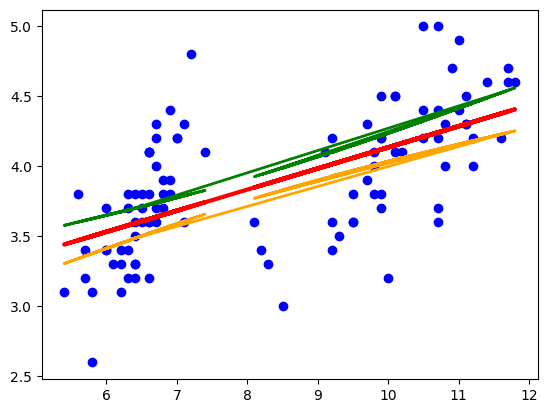

In [226]:
alpha = 0.05
yhat_lower_bound = yhat - stats.t(df = dim).ppf(1 - alpha / 2) * (s * np.sqrt(1/n + (x - xbar) ** 2 / sxx))
yhat_upper_bound = yhat + stats.t(df = dim).ppf(1 - alpha / 2) * (s * np.sqrt(1/n + (x - xbar) ** 2 / sxx))

plt.scatter(x, y, color='blue')
plt.plot(x, yhat, color = 'red', lw=3)
plt.plot(x, yhat_lower_bound, color='orange', lw=2)
plt.plot(x, yhat_upper_bound, color='green', lw=2)

3. Create a new data frame including 'setosa' only. We will fit a regression line using the new data frame.

In [227]:
new_data = df[df["Group"] == "setosa"]
new_data

,v1,w1,v2,w2,Group,x,y
0,5.100,3.500,1.400,0.200,setosa,6.500,3.700
1,4.900,3.000,1.400,0.200,setosa,6.300,3.200
2,4.700,3.200,1.300,0.200,setosa,6.000,3.400
3,4.600,3.100,1.500,0.200,setosa,6.100,3.300
4,5.000,3.600,1.400,0.200,setosa,6.400,3.800
5,5.400,3.900,1.700,0.400,setosa,7.100,4.300
6,4.600,3.400,1.400,0.300,setosa,6.000,3.700
7,5.000,3.400,1.500,0.200,setosa,6.500,3.600
8,4.400,2.900,1.400,0.200,setosa,5.800,3.100
9,4.900,3.100,1.500,0.100,setosa,6.400,3.200


(1) Find $\hat\beta_0$ and $\hat\beta_1$ using the new data frame. Write the equation of the fitted regression line: $\quad \hat y_i = \hat\beta_0+\hat\beta_1 x_i$

In [228]:
new_data = df[df["Group"] == "setosa"]
new_x = new_data["x"]
new_y = new_data["y"]
new_xbar = np.mean(new_x)
new_ybar = np.mean(new_y)
new_sxx = np.sum((new_x - new_xbar) ** 2)
new_syy = np.sum((new_y - new_ybar) ** 2)
new_sxy = np.sum((new_x - new_xbar) * (new_y - new_ybar))

data = np.column_stack((new_xbar, new_ybar, new_sxx, new_syy, new_sxy))
SS = pd.DataFrame(data, columns= ['new_xbar', 'new_ybar', 'new_sxx', 'new_syy', 'new_sxy'])
pd.options.display.float_format = '{:,.1f}'.format 
display(SS)

new_beta1hat = new_sxy / new_sxx
new_beta0hat = new_ybar - (new_beta1hat * new_xbar)
new_data_stack = np.column_stack((new_beta1hat, new_beta0hat))
new_beta_table = pd.DataFrame(new_data_stack, columns=['new_beta0hat', 'new_beta1hat'])
display(new_beta_table)

# We always calculate the beta1hat first, then the beta0hat
print(f"The coefficient of the fitted linear regression model is y = {beta0hat:6.4} + {beta1hat:6.3}x")


,new_xbar,new_ybar,new_sxx,new_syy,new_sxy
0,6.5,3.7,9.2,8.5,6.2


,new_beta0hat,new_beta1hat
0,0.7,-0.7


The coefficient of the fitted linear regression model is y =  2.628 +  0.151x


(2) Add the fitted line to the scatter plot you obtained in 2-(2).

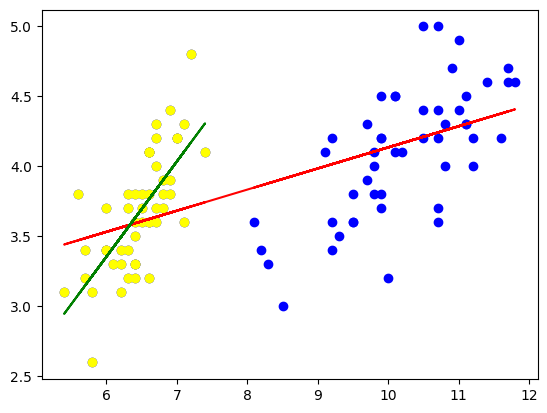

In [229]:
new_yhat = new_beta0hat + (new_beta1hat * new_x)
plt.scatter(x, y, color= 'blue')
plt.scatter(new_x, new_y, color= 'yellow')
plt.plot(x, yhat, color= 'red')
plt.plot(new_x, new_yhat, color= 'green')
plt.show()